In [1]:
%matplotlib inline 

In [2]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import scipy.stats as sts 

In [3]:
pyber_ride_df = pd.read_csv('Resources/PyBer_ride_data.csv')
pyber_ride_df

,Month,Avg. Fare ($USD)
0,Jan,10.02
1,Feb,23.24
2,Mar,39.20
3,April,35.42
4,May,32.34
5,June,27.04
6,July,43.82
7,Aug,10.56
8,Sept,11.85
9,Oct,27.90


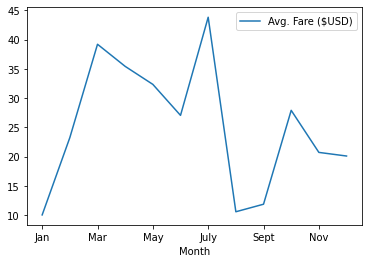

In [4]:
pyber_ride_df.plot(x='Month', y ="Avg. Fare ($USD)")
plt.show()

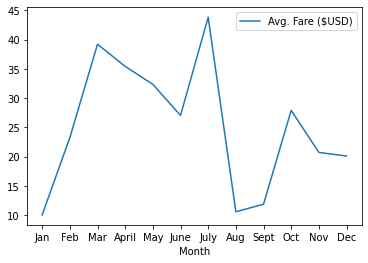

In [5]:
# set x-axis and tick locations 
x_axis = np.arange(len(pyber_ride_df)) # 0 ~ 11 
tick_locations = [value for value in x_axis]

pyber_ride_df.plot(x='Month', y ="Avg. Fare ($USD)")
plt.xticks(tick_locations,pyber_ride_df['Month'])
plt.show()

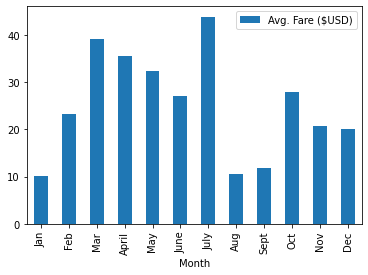

In [6]:
pyber_ride_df.plot.bar(x='Month', y ="Avg. Fare ($USD)")
plt.show()

In [7]:
import statistics 
stdev = statistics.stdev(pyber_ride_df["Avg. Fare ($USD)"])
stdev

11.208367917035753

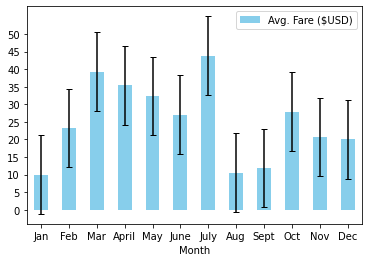

In [8]:
#add error bar, caps to the error bars, changed the color into skyblue 
pyber_ride_df.plot.bar(x='Month', y ="Avg. Fare ($USD)", yerr = stdev, capsize=3, color ='skyblue')

#rotate the labels on the x-axis to horizontal 
plt.xticks(rotation = 0)

#set the y-axis increment to every $5 
plt.yticks(np.arange(0,51, step = 5.0))

plt.show()

In [9]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [10]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [11]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [12]:
# get the columns and row that are not null 
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [13]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [14]:
city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [15]:
# get the number of data points from the urban cities 
sum(city_data_df['type']=='Urban')

66

In [16]:
sum(city_data_df['type']=='Suburban')

36

In [17]:
sum(city_data_df['type']=='Rural')

18

In [18]:
# get the columns and row that are not null 
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [19]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [20]:
# combine the data into a single dataset 
pyber_data_df = pd.merge(ride_data_df, city_data_df, how ='left', on = ['city', 'city'])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [21]:
# create the urban city dataframe 
urban_cities_df = pyber_data_df[pyber_data_df['type']=='Urban']
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [22]:
# create the suburban city dataframe 
suburban_cities_df = pyber_data_df[pyber_data_df['type']=='Suburban']
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [23]:
# create the rural city dataframe 
rural_cities_df = pyber_data_df[pyber_data_df['type']=='Rural']
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [24]:
#get the number of rides for urban cities 
urban_ride_count = urban_cities_df.groupby(['city']).count()['ride_id']
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [25]:
#get the number of rides for suburban cities 
suburban_ride_count = suburban_cities_df.groupby(['city']).count()['ride_id']
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [26]:
#get the number of rides for rural cities 
rural_ride_count = rural_cities_df.groupby(['city']).count()['ride_id']
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [27]:
#get average fare for each city in the urban cities
urban_avg_fare = urban_cities_df.groupby(['city']).mean()['fare']
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [28]:
#get average fare for each city in the suburban cities
suburban_avg_fare = suburban_cities_df.groupby(['city']).mean()['fare']
suburban_avg_fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [29]:
#get average fare for each city in the rural cities
rural_avg_fare = rural_cities_df.groupby(['city']).mean()['fare']
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [30]:
#get the average number of drivers for each urban city 
urban_driver_count = urban_cities_df.groupby(['city']).mean()['driver_count']
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [31]:
#get the average number of drivers for each suburban city 
suburban_driver_count = suburban_cities_df.groupby(['city']).mean()['driver_count']
suburban_driver_count.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [32]:
#get the average number of drivers for each rural city 
rural_driver_count = rural_cities_df.groupby(['city']).mean()['driver_count']
rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

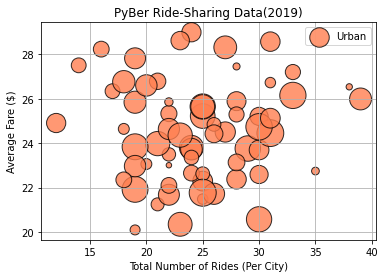

In [33]:
#build a scatter plots for urban cities 
plt.scatter(urban_ride_count,urban_avg_fare, s=urban_driver_count* 10, 
           color = 'coral', edgecolor ='black', linewidth = 1, alpha = 0.8, label ="Urban")

plt.legend()
plt.title("PyBer Ride-Sharing Data(2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()

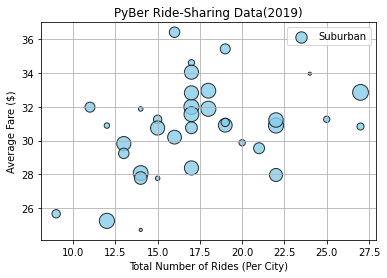

In [34]:
#build a scatter plots for suburban cities 
plt.scatter(suburban_ride_count,suburban_avg_fare, s = suburban_driver_count* 10, 
           color = 'skyblue', edgecolor ='black', linewidth = 1, alpha = 0.8, label ="Suburban")

plt.legend()
plt.title("PyBer Ride-Sharing Data(2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()

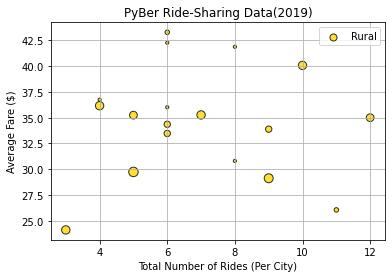

In [35]:
#build a scatter plots for rural cities 
plt.scatter(rural_ride_count,rural_avg_fare, s = rural_driver_count* 10, 
           color = 'gold', edgecolor ='black', linewidth = 1, alpha = 0.8, label ="Rural")

plt.legend()
plt.title("PyBer Ride-Sharing Data(2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()

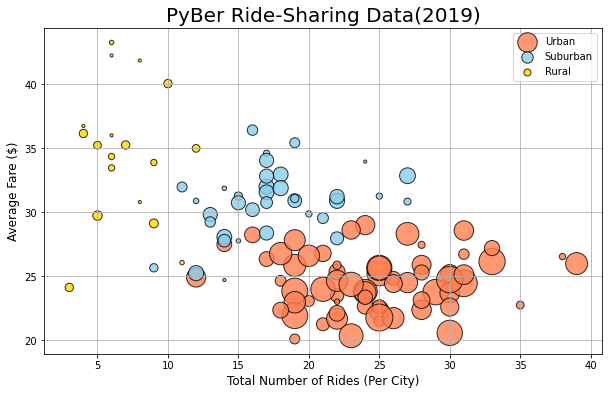

In [36]:
plt.subplots(figsize=(10,6))

plt.scatter(urban_ride_count,urban_avg_fare, s=urban_driver_count* 10, 
           color = 'coral', edgecolor ='black', linewidth = 1, alpha = 0.8, label ="Urban")
plt.scatter(suburban_ride_count,suburban_avg_fare, s = suburban_driver_count* 10, 
           color = 'skyblue', edgecolor ='black', linewidth = 1, alpha = 0.8, label ="Suburban")
plt.scatter(rural_ride_count,rural_avg_fare, s = rural_driver_count* 10, 
           color = 'gold', edgecolor ='black', linewidth = 1, alpha = 0.8, label ="Rural")


plt.legend()
plt.title("PyBer Ride-Sharing Data(2019)", fontsize = 20)
plt.xlabel("Total Number of Rides (Per City)", fontsize = 12)
plt.ylabel("Average Fare ($)", fontsize = 12)
plt.grid()


plt.show()


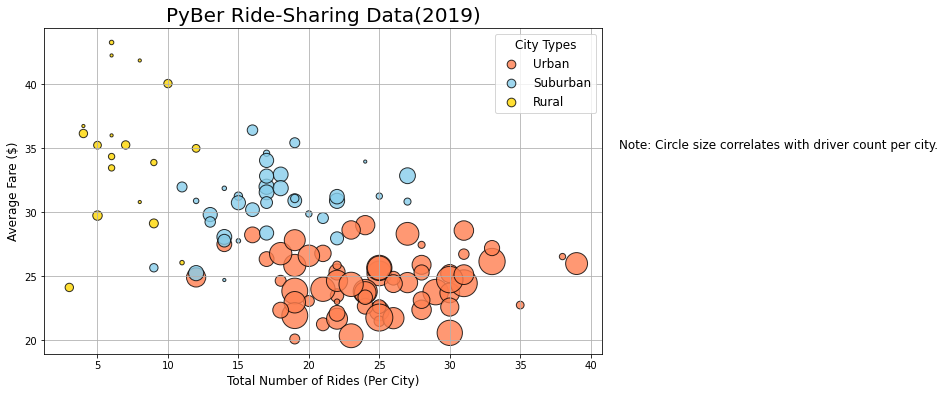

In [37]:
plt.subplots(figsize=(10,6))

plt.scatter(urban_ride_count,urban_avg_fare, s=urban_driver_count* 10, 
           color = 'coral', edgecolor ='black', linewidth = 1, alpha = 0.8, label ="Urban")
plt.scatter(suburban_ride_count,suburban_avg_fare, s = suburban_driver_count* 10, 
           color = 'skyblue', edgecolor ='black', linewidth = 1, alpha = 0.8, label ="Suburban")
plt.scatter(rural_ride_count,rural_avg_fare, s = rural_driver_count* 10, 
           color = 'gold', edgecolor ='black', linewidth = 1, alpha = 0.8, label ="Rural")


plt.legend()
plt.title("PyBer Ride-Sharing Data(2019)", fontsize = 20)
plt.xlabel("Total Number of Rides (Per City)", fontsize = 12)
plt.ylabel("Average Fare ($)", fontsize = 12)
plt.grid()

# create a legend 
lgnd = plt.legend(fontsize='12', mode ='Expanded', scatterpoints =1, loc ='best', title ='City Types')
lgnd.legendHandles[0]._sizes =[75]
lgnd.legendHandles[1]._sizes =[75]
lgnd.legendHandles[2]._sizes =[75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

#save the figure 
plt.savefig("analysis/Fig1.png")

plt.show()

In [38]:
# calculate the measures of central tendency for the rider count for the urban cities 
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")
median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count:.2f}.")
mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.00.
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).


In [39]:
# calculate the measures of central tendency for the rider count for the suburban cities 
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")
median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count:.2f}.")
mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.00.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17]), count=array([7])).


In [40]:
# calculate the measures of central tendency for the rider count for the rural cities 
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")
median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count:.2f}.")
mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.00.
The mode for the ride counts for rural trips is ModeResult(mode=array([6]), count=array([5])).


In [41]:
# get the fares for the urban cities 
urban_fares = urban_cities_df['fare']
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [42]:
# calculate the measures of central tendency for the average fare for the urban cities 
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is {mean_urban_fares:.2f}.")
median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is {median_urban_fares:.2f}.")
mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is 24.53.
The median fare price for urban trips is 24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [43]:
# get the fares for the suburban cities 
suburban_fares = suburban_cities_df['fare']
suburban_fares.head()

1625    27.79
1626    18.75
1627    21.71
1628    17.10
1629    37.78
Name: fare, dtype: float64

In [44]:
# calculate the measures of central tendency for the average fare for the suburban cities 
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is {mean_suburban_fares:.2f}.")
median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is {median_suburban_fares:.2f}.")
mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is 30.97.
The median fare price for suburban trips is 30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [45]:
# get the fares for the rural cities 
rural_fares = rural_cities_df['fare']
rural_fares.head()

2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
Name: fare, dtype: float64

In [46]:
# calculate the measures of central tendency for the average fare for the rural cities 
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is {mean_rural_fares:.2f}.")
median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is {median_rural_fares:.2f}.")
mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for rural trips is 34.62.
The median fare price for rural trips is 37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [47]:
# get the driver count data from the urban cities 
urban_drivers = urban_cities_df['driver_count']
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [48]:
# calculate the measures of central tendency for the average driver count for the urban cities 
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean driver count for urban trips is {mean_urban_drivers:.2f}.")
median_urban_drivers = np.median(urban_drivers)
print(f"The median driver count for urban trips is {median_urban_drivers:.2f}.")
mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode driver count for urban trips is {mode_urban_drivers}.")

The mean driver count for urban trips is 36.68.
The median driver count for urban trips is 37.00.
The mode driver count for urban trips is ModeResult(mode=array([39]), count=array([86])).


In [49]:
# get the driver count data from the suburban cities 
suburban_drivers = suburban_cities_df['driver_count']
suburban_drivers.head()

1625    11
1626    20
1627    22
1628    19
1629    12
Name: driver_count, dtype: int64

In [50]:
# calculate the measures of central tendency for the average driver count for the suburban cities 
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean driver count for suburban trips is {mean_suburban_drivers:.2f}.")
median_suburban_drivers = np.median(suburban_drivers)
print(f"The median driver count for suburban trips is {median_suburban_drivers:.2f}.")
mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode driver count for suburban trips is {mode_suburban_drivers}.")

The mean driver count for suburban trips is 13.71.
The median driver count for suburban trips is 16.00.
The mode driver count for suburban trips is ModeResult(mode=array([20]), count=array([79])).


In [51]:
# get the driver count data from the rural cities 
rural_drivers = rural_cities_df['driver_count']
rural_drivers.head()

2250    9
2251    8
2252    6
2253    2
2254    2
Name: driver_count, dtype: int64

In [52]:
# calculate the measures of central tendency for the average driver count for the suburban cities 
mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean driver count for rural trips is {mean_rural_drivers:.2f}.")
median_rural_drivers = np.median(rural_drivers)
print(f"The median driver count for rural trips is {median_rural_drivers:.2f}.")
mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode driver count for rural trips is {mode_rural_drivers}.")

The mean driver count for rural trips is 4.30.
The median driver count for rural trips is 4.00.
The mode driver count for rural trips is ModeResult(mode=array([1]), count=array([32])).


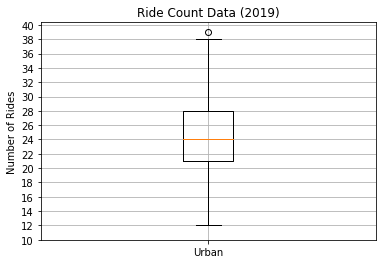

In [53]:
# create a box-and-whisker plot for the urban cities ride count 
x_labels = ['Urban']
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels = x_labels)

# add the title, y-axis label and grid
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10,41,step=2.0))
ax.grid() 

plt.show()

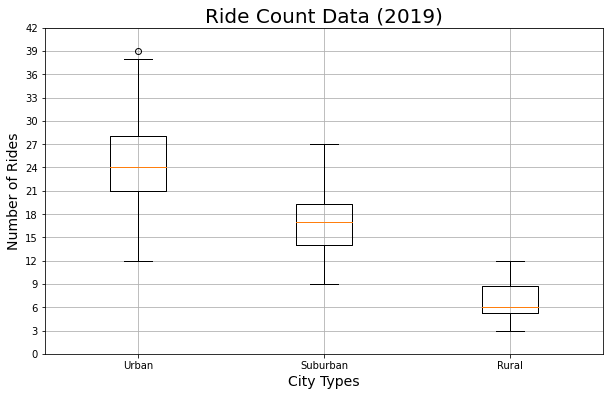

In [58]:
# Add all ride count box and whisker plots to the same graph 
x_labels = ['Urban', "Suburban", "Rural"]
ride_count_data = [urban_ride_count,suburban_ride_count, rural_ride_count]

fig, ax = plt.subplots(figsize=(10,6))

# add the title, x,y-axis label and grid
ax.set_title('Ride Count Data (2019)', fontsize =20)
ax.set_ylabel('Number of Rides', fontsize =14)
ax.set_xlabel('City Types', fontsize=14)

ax.boxplot(ride_count_data, labels=x_labels)

ax.set_yticks(np.arange(0,45,step=3.0))
ax.grid() 

#save the figure 
plt.savefig("analysis/Fig2.png")
plt.show()

In [62]:
#get the city that matches 39 
urban_city_outlier = urban_ride_count[urban_ride_count == 39].index[0]
print(f'{urban_city_outlier} has the higest rider count')

West Angela has the higest rider count


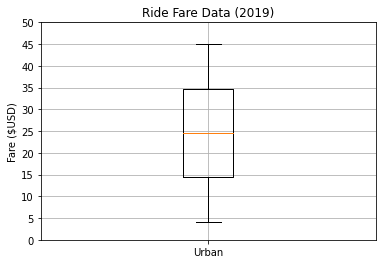

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [65]:
# create a box-and-whisker plot for the urban cities ride fare 
x_labels = ['Urban']
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels = x_labels)

# add the title, y-axis label and grid
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare ($USD)')
ax.set_yticks(np.arange(0,51,step=5.0))
ax.grid() 

plt.show()

print("Summary Statistics")
urban_fares.describe()

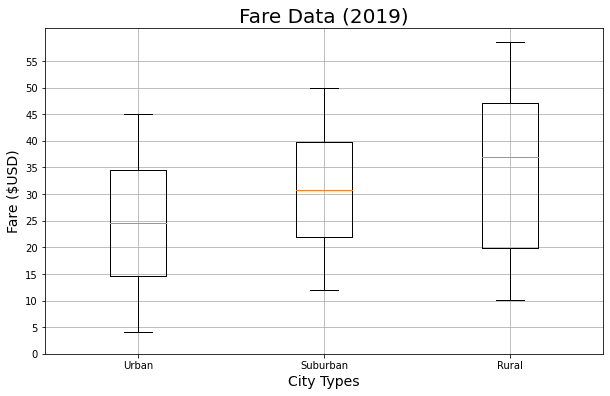

In [68]:
# Add all ride count box and whisker plots to the same graph 
x_labels = ['Urban', "Suburban", "Rural"]
fare_data = [urban_fares,suburban_fares, rural_fares]

fig, ax = plt.subplots(figsize=(10,6))

# add the title, x,y-axis label and grid
ax.set_title('Fare Data (2019)', fontsize =20)
ax.set_ylabel('Fare ($USD)',fontsize=14)
ax.set_xlabel('City Types', fontsize=14)

ax.boxplot(fare_data, labels = x_labels)

ax.set_yticks(np.arange(0,60,step=5.0))
ax.grid() 

#save the figure 
plt.savefig("analysis/Fig3.png")
plt.show()

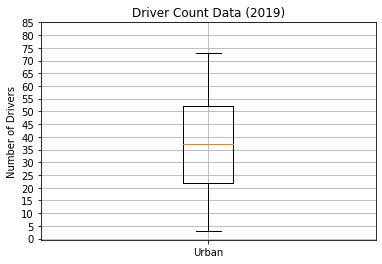

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [69]:
# create a box-and-whisker plot for the urban driver count data 
x_labels = ['Urban']
fig, ax = plt.subplots()
ax.boxplot(urban_drivers, labels = x_labels)

# add the title, y-axis label and grid
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0,90,step=5.0))
ax.grid() 

plt.show()

print("Summary Statistics")
urban_drivers.describe()

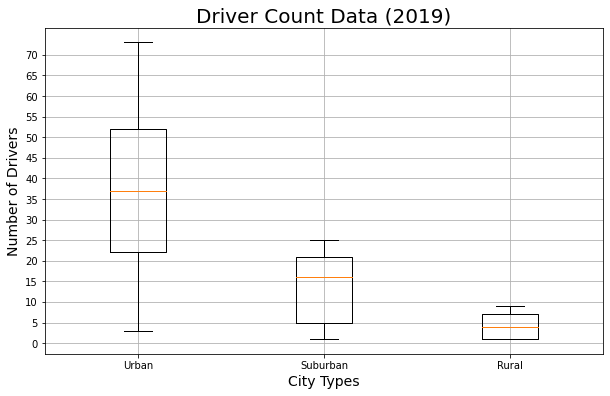

In [71]:
# Add all ride count box and whisker plots to the same graph 
x_labels = ['Urban', "Suburban", "Rural"]
drivers_data = [urban_drivers,suburban_drivers, rural_drivers]

fig, ax = plt.subplots(figsize=(10,6))

# add the title, x,y-axis label and grid
ax.set_title('Driver Count Data (2019)', fontsize =20)
ax.set_ylabel('Number of Drivers',fontsize=14)
ax.set_xlabel('City Types', fontsize=14)

ax.boxplot(drivers_data, labels = x_labels)

ax.set_yticks(np.arange(0,75,step=5.0))
ax.grid() 

#save the figure 
plt.savefig("analysis/Fig4.png")
plt.show()

In [72]:
# get the sum of the fares for each city type 
sum_fares_by_type = pyber_data_df.groupby(['type']).sum()['fare']
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [74]:
total_fares = pyber_data_df['fare'].sum()
total_fares

63538.64

In [76]:
# calculate the pecentage of fare for each city type 
type_percents = 100 * sum_fares_by_type / total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

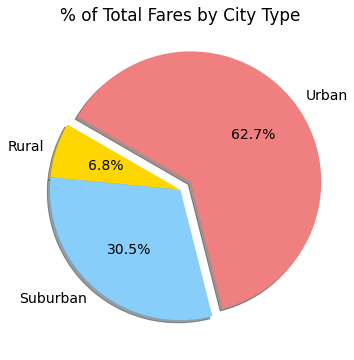

In [88]:
# import mpl to change the plot configurations using rcParams 
import matplotlib as mpl 

# build the percentage of fares by city type pie chart 
plt.subplots(figsize=(10,6))
plt.pie(type_percents, labels=['Rural', 'Suburban', 'Urban'], colors =['gold', 'lightskyblue', "lightcoral"], 
       explode = [0,0,0.1], autopct ='%1.1f%%', shadow =True, startangle = 150)
plt.title('% of Total Fares by City Type')

#change the default font size from 10 to 14 
mpl.rcParams['font.size'] = 14 
#save figure 
plt.savefig("analysis/Fig5.png")

plt.show()

In [83]:
# get the sum of the riders for each city type 
sum_riders_by_type = pyber_data_df.groupby(['type']).count()['ride_id']
sum_riders_by_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [85]:
total_ride = pyber_data_df['ride_id'].count()
total_ride

2375

In [86]:
ride_percents = 100 * sum_riders_by_type/total_ride
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

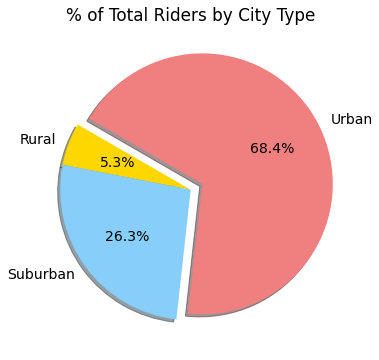

In [89]:
# build the percentage of ride by city type pie chart 
plt.subplots(figsize=(10,6))
plt.pie(ride_percents, labels=['Rural', 'Suburban', 'Urban'], colors =['gold', 'lightskyblue', "lightcoral"], 
       explode = [0,0,0.1], autopct ='%1.1f%%', shadow =True, startangle = 150)
plt.title('% of Total Riders by City Type')

#change the default font size from 10 to 14 
mpl.rcParams['font.size'] = 14 
#save figure 
plt.savefig("analysis/Fig6.png")

plt.show()

In [96]:
# get the sum of the drivers for each city type 
sum_drivers_by_type = city_data_df.groupby(['type']).sum()['driver_count']
sum_drivers_by_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [97]:
total_driver = city_data_df['driver_count'].sum()
total_driver

2973

In [98]:
driver_percentage = 100 * sum_drivers_by_type / total_driver
driver_percentage

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

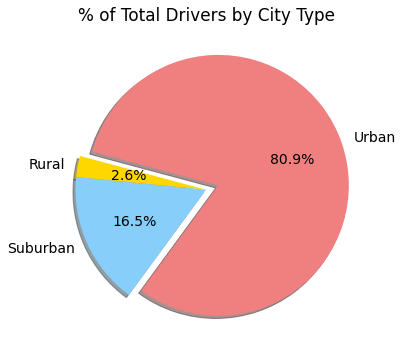

In [100]:
# build the percentage of ride by city type pie chart 
plt.subplots(figsize=(10,6))
plt.pie(driver_percentage, labels=['Rural', 'Suburban', 'Urban'], colors =['gold', 'lightskyblue', "lightcoral"], 
       explode = [0,0,0.1], autopct ='%1.1f%%', shadow =True, startangle = 165)
plt.title('% of Total Drivers by City Type')

#change the default font size from 10 to 14 
mpl.rcParams['font.size'] = 14 
#save figure 
plt.savefig("analysis/Fig7.png")

plt.show()